# [Library yang dibutuhkan](https://academy.dqlab.id/main/livecode/260/475/2379)

In [9]:
import json
import numpy as np
import pandas as pd
import requests

# [Membuat Fungsi get API](https://academy.dqlab.id/main/livecode/260/476/2393)

In [10]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

# [Memanggil API Covid19](https://academy.dqlab.id/main/livecode/260/476/2381)

In [11]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


# [Merubah Format date](https://academy.dqlab.id/main/livecode/260/476/2382)

In [12]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format= '%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

# [Mengambil Data Countries](https://academy.dqlab.id/main/livecode/260/476/2383)

In [14]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


# [Merge Covid19 Data dan Countries](https://academy.dqlab.id/main/livecode/260/477/2384)

In [15]:
df_covid_denormalized = pd.merge (df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


# [Menghitung Fatality Ratio](https://academy.dqlab.id/main/livecode/260/477/2385)

In [17]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

# [Negara-negara dengan Fatality Ratio Tertinggi](https://academy.dqlab.id/main/livecode/260/477/2386)

In [18]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

# [Import Library Visualisasi](https://academy.dqlab.id/main/livecode/260/477/2387)

In [19]:
import matplotlib.pyplot as plt

# [Visualisasi Negara dengan Fatality Ratio Tertinggi](https://academy.dqlab.id/main/livecode/260/477/2388)

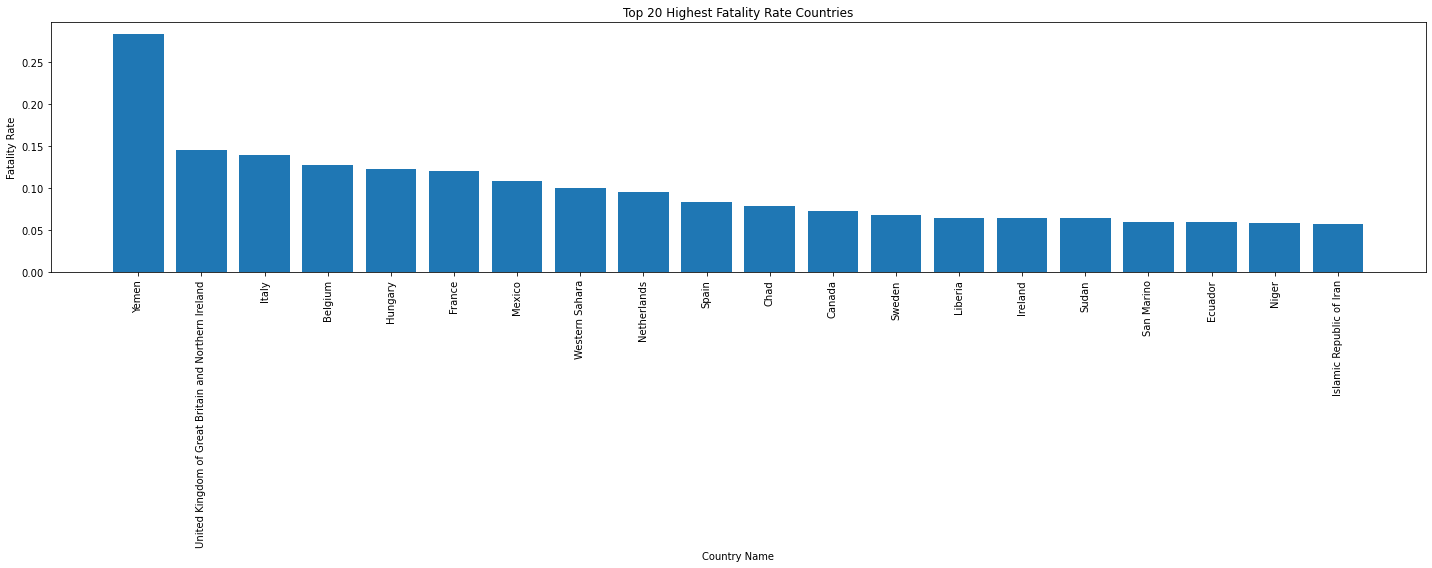

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# [Menggabungkan Dataframe](https://academy.dqlab.id/main/livecode/260/478/2389)

In [21]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      VN  2021-01-26   1549      35       1425
1      VN  2021-01-25   1549      35       1425
2      VN  2021-01-24   1548      35       1411
3      VN  2021-01-23   1548      35       1411
4      VN  2021-01-22   1548      35       1411


# [Merge Data Covid19 Dengan Data Country](https://academy.dqlab.id/main/livecode/260/478/2390)

In [22]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged , df_countries , on='country')

# [Kasus Covid-19 di ASEAN pada Bulan Maret 2020](https://academy.dqlab.id/main/livecode/260/478/2391)

In [23]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

# [Visualisasi Kasus Covid-19 di ASEAN](https://academy.dqlab.id/main/livecode/260/478/2392)

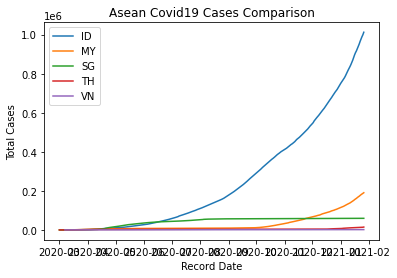

In [24]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update'] 
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()